In [30]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pyart import graph
import numpy as np
from glob import glob
from datetime import datetime as dt
import os
import sys
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
from pyproj import Proj as Proj
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from pyMRMS import retrieveMRMS,readFL,annotate

%matplotlib inline

In [31]:
getMRMS = False
strtMRMS='20170430-180000'
endMRMS='20170430-200000'
mrmsSaveDir='/Users/danstechman/Desktop/MRMS/'

pltFT = False
flFile = '/Users/danstechman/GoogleDrive/VSE-Data/flightLevel/20170430H1_AC.nc'
strtFL = strtMRMS
endFL = endMRMS

minLat = 33.5
minLon = -89
maxLat = 39.5
maxLon = -84



In [32]:
if getMRMS:
    retrieveMRMS.fetch(strtMRMS,endMRMS,mrmsSaveDir)

In [33]:
if pltFT:
    flData = readFL.getP3(flFile,strtDT=strtFL,endDT=endFL)

In [34]:
mData = retrieveMRMS.extract('/Users/danstechman/Desktop/MRMS/',strtDT=strtMRMS,endDT=endMRMS,llCrds=(minLat,minLon),urCrds=(maxLat,maxLon))

AttributeError: Unknown property ax

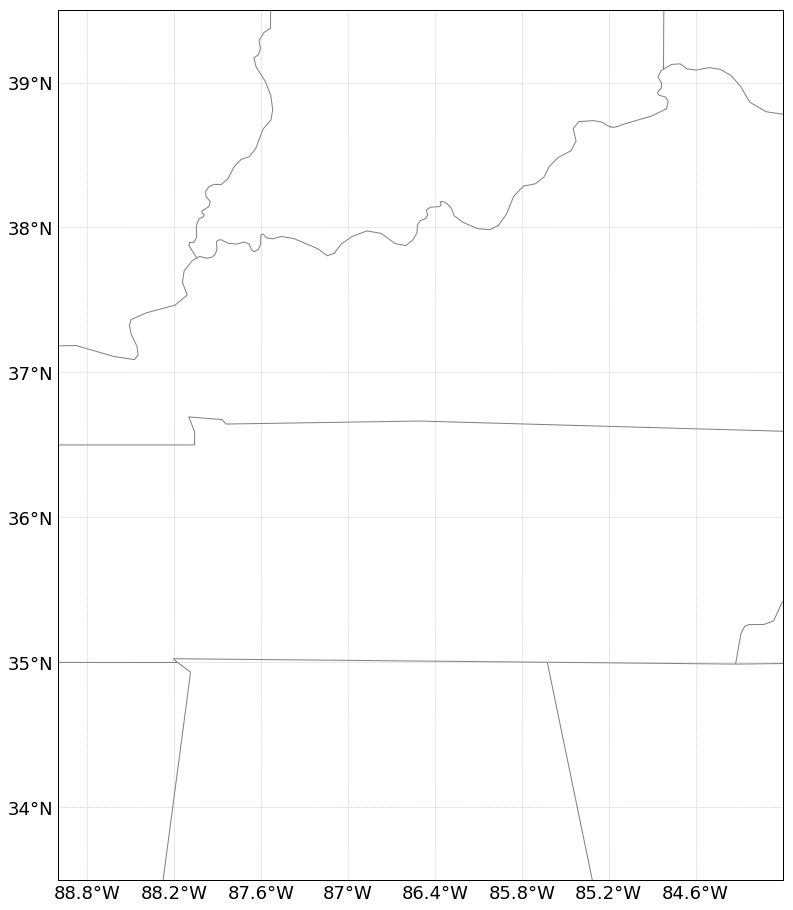

In [39]:
vMin = -4 # Max and min values to plot
vMax = 60
cmap = graph.cm_colorblind.HomeyerRainbow
cmap.set_under('w')
bounds = np.linspace(vMin,vMax,(np.abs(vMin)+np.abs(vMax)+1))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# norm = None
cbarStr = 'Reflectivity (dBZ)'

proj = ccrs.PlateCarree()

states_provinces = cf.NaturalEarthFeature(
        category='cultural',name='admin_1_states_provinces_lines',
        scale='50m',facecolor='none')


# for ix,iDT in zip(range(mData['mDT']),mData['mDT']):

fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(111,projection=proj)
ax.coastlines()
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.BORDERS)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_extent([minLon,maxLon,minLat,maxLat])

grd = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
grd.xlabels_top = False
grd.ylabels_right = False
grd.xformatter = LONGITUDE_FORMATTER
grd.yformatter = LATITUDE_FORMATTER
grd.xlabel_style = {'size': 18}
grd.ylabel_style = {'size': 18}

plt.pcolormesh(mData['mLon'],mData['mLat'],mData['mSHSR'][0,:,:],cmap=cmap,norm=norm,vmin=vMin,vmax=vMax,transform=proj)

cb = plt.colorbar(shrink=0.7, pad = 0.01, aspect=25)
cb.set_label('Reflectivity (dBZ)',size=17)
cb.ax.tick_params(labelsize=14)
ax.text(-0.07, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', size=20,
        transform=ax.transAxes)
ax.text(0.5, -0.12, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', size=20,
        transform=ax.transAxes)
plt.title('MRMS Seamless Hybrid Scan Reflectivity',size=22)